In [ ]:
#4 mins, must discuss what we predicted, NOT a pitch, no acting, features I tried to include, which I tried and how they did/didn't work
#no code, keep it pretty
#no "f-test" language

# Importing Packages, Part 1

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import os
import re 
import seaborn as sns
pysqldf = lambda q: sqldf(q, globals())
import datetime 
from dateutil import parser

from sklearn import cross_validation, datasets


plt.style.available
plt.style.use('ggplot')

%matplotlib inline

/home/catherine/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Importing CSV as a dataframe
**2000 top grossing films based on domestic adjusted gross

In [2]:
#top grossing films based on domestic adjusted gross
df = pd.read_csv('movie_data.csv')
df

,Unnamed: 0,distributor,domestic_adj_gross,genre,mpaa_rating,production_budget,release_date,runtime_mins,title
0,0,Buena Vista,936276700,Sci-Fi Fantasy,PG-13,$245 million,2015-12-18,136,Star Wars: The Force Awakens
1,1,Fox,830529800,Sci-Fi Adventure,PG-13,NaN,2009-12-18,160,Avatar
2,2,Paramount,1111475400,Romance,PG-13,$200 million,1997-12-19,194,Titanic
3,3,Universal,684566100,Sci-Fi Horror,PG-13,$150 million,2015-06-12,124,Jurassic World
4,4,Buena Vista,665791300,Action / Adventure,PG-13,$220 million,2012-05-04,142,Marvel's The Avengers
5,5,Warner Bros.,643169700,Action / Adventure,PG-13,$185 million,2008-07-18,150,The Dark Knight
6,6,Buena Vista,480339200,Animation,PG,NaN,2016-06-17,103,Finding Dory
7,7,Fox,734591500,Sci-Fi Fantasy,PG,$115 million,1999-05-19,133,Star Wars: Episode I - The Phantom Menace
8,8,Fox,1236076600,Sci-Fi Fantasy,PG,$11 million,1977-05-25,121,Star Wars
9,9,Buena Vista,463543100,Action / Adventure,PG-13,$250 million,2015-05-01,141,Avengers: Age of Ultron


# Many columns are objects, which I cannot use

In [3]:
df.dtypes

Unnamed: 0             int64
distributor           object
domestic_adj_gross     int64
genre                 object
mpaa_rating           object
production_budget     object
release_date          object
runtime_mins           int64
title                 object
dtype: object

In [ ]:
# def money_int(moneystring):
#     if 'million' in moneystring or 'mil' in moneystring:
#                 moneystring = moneystring.replace('$', '')
#                 moneystring = moneystring.replace(',', '')
#                 moneystring = moneystring.replace('million','')
#                 moneystring = int(moneystring)*1000000
#     else:
#         return None

In [ ]:
# df['production_budget'] = money_int(df['production_budget'])

In [ ]:
df['production_budget'].dtypes

# Just experimenting - highest grossing genres and MPAA ratings

In [ ]:
df.groupby('genre')['domestic_adj_gross'].mean().sort_values(ascending=False)

In [ ]:
df.groupby('mpaa_rating')['domestic_adj_gross'].mean().sort_values(ascending=False)

# More experimenting - top 10 distributors by gross

In [ ]:
genre_gross = df.groupby('distributor')['domestic_adj_gross'].mean().sort_values(ascending=False)

fig, ax = plt.subplots()
ax.barh(range(10), genre_gross[:10])
ax.set_yticklabels(genre_gross[:10].index, va='center')
ax.set_yticks(np.arange(10)+.5)
ax.set_title('Top 10 Distributors by Adj. Mean Gross', fontsize=16, fontweight='bold', y=1.02)
ax.set_xlabel('Domestic Total Gross', fontsize=12)
ax.set_ylabel('Distributor', fontsize=12)
plt.gca().invert_yaxis()

# Converting release date to datetime object - can now extract year etc.

In [4]:
df['release_date'] =  pd.to_datetime(df['release_date'], infer_datetime_format=True)

In [5]:
df['year'] = df['release_date'].apply(lambda x: (x.year))

#### Making season variable

In [6]:
def season(x):
    if x in [12,1,2]:
        return 'Winter'
    elif x in [3,4,5]:
        return 'Spring'
    elif x in [6,7,8]:
        return 'Summer'
    else:
        return 'Fall'

In [7]:
df['Season'] = df['release_date'].apply(lambda x: season(x.month))

In [ ]:
season_gross = df.groupby('Season')['domestic_adj_gross'].mean().sort_values(ascending=False)

fig, ax = plt.subplots()
ax.barh(range(len(rating_gross)), rating_gross)
ax.set_yticklabels(rating_gross.index, va='center')
ax.set_yticks(np.arange(len(rating_gross))+.5)
ax.set_title('Mean Gross by Season', fontsize=16, fontweight='bold', y=1.02)
ax.set_xlabel('Domestic Adj. Gross', fontsize=12)
ax.set_ylabel('Season', fontsize=12)
plt.gca().invert_yaxis()

In [ ]:
np.log(df['domestic_adj_gross']).hist() 

AttributeError: 'module' object has no attribute 'fromordinal'

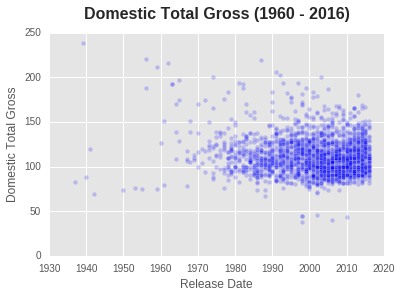

In [8]:
fig, ax = plt.subplots()
ax.scatter(df['year'], df['runtime_mins'], alpha=0.2)
ax.set_title('Domestic Total Gross (1960 - 2016)', fontsize=16, fontweight='bold', y=1.04)
ax.set_xlabel('Release Date')
ax.set_ylabel('Domestic Total Gross')
ax.tick_params(axis='both', which='major', pad=8)
dates = [datetime.fromordinal(x).strftime('%m-%d-%Y') for x in map(int, ax.get_xticks().tolist())]
ax.set_xticklabels(dates, rotation=45, ha='center')
ax.xaxis.get_major_ticks()[-1].set_visible(False)

# Must create an ordinal version of release_date for regression

In [9]:
#gives number of days since year 1, month 1, day 1 (of earth, not the dataset)
df['release_date_ordinal'] = df['release_date'].apply(lambda x: x.toordinal())

# Converting the money string in budget to a money float

In [10]:
def money_int(moneystring):
    if type(moneystring) == float:
        return moneystring
    else:
            moneystring = moneystring.replace('$', '')
            moneystring = moneystring.replace(',', '')
            moneystring = moneystring.replace('million','')
            moneystring = float(moneystring)*1000000
            return moneystring

In [11]:
df["production_budget"] = df["production_budget"].apply(lambda x: money_int(x))

for i, group in df.groupby('genre'):
    plt.figure()
    group.plot(x='release_date_ordinal', y='domestic_adj_gross', title=str(i))

NameError: name 'dtype' is not defined

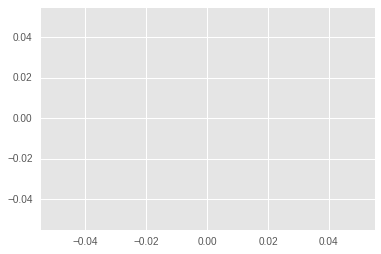

In [22]:
egg = df['domestic_adj_gross'].mean

# for i, group in df.groupby('genre'): 
#     plt.figure() 
#     group.plot(x='year', y = egg, title=str(i))
    
groups = df.groupby('genre')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(x='year', y=egg, marker='o', linestyle='', ms=12, label='name')
ax.legend()

plt.show()    

In [ ]:
df.head()

# A second possibility for what to predict - actual money earned

In [ ]:
df['real_profit'] = df["domestic_adj_gross"] - df["production_budget"]

In [ ]:
df['real_profit']

# Makin' binary dummy variables from our fave categorical vars

In [ ]:
#make categorical variables into dummy vars so they can be regressors
dist_dum = pd.get_dummies(df['distributor'])
gen_dum = pd.get_dummies(df['genre'])
rating_dum = pd.get_dummies(df['mpaa_rating'])
season_dum = pd.get_dummies(df['Season'])

#Drops originals to clean up da cluttuh

df = pd.concat([df, dist_dum, gen_dum, rating_dum, season_dum], axis=1)
df.drop(['distributor', 'genre', 'mpaa_rating', 'Season'], axis=1, inplace=True)

# Drop NAs from df, which is df_1 for this attempt

In [ ]:
from sklearn import preprocessing

df_1 = df
df_1 = df_1.dropna()
df_1 = df_1.loc[:, ~df_1.apply(lambda x: np.all(x==0))]
df_1.reset_index(drop=True, inplace=True)
df_1.head()

  # REDUNDANT - Combine old and new MPAA rating labels

In [ ]:
#Redundant after removing NA values
# df_1['PG'] = df_1['PG']+df_1['GP']
# df_1['R'] = df_1['R']+df_1['M']
# df_1 = df_1.drop(['GP'],axis = 1)
# df_1 = df_1.drop(['M'], axis = 1)
df_1.head()

### Look at all these nice columns in our new dataframe clone

In [ ]:
df_1.columns.values 

# drop unhelpful variables before starting analysis

In [ ]:


df_1 = df_1.drop(['title'],axis = 1)
df_1 = df_1.drop(['release_date'], axis = 1)
df_1 = df_1.drop(['Unnamed: 0'], axis = 1)

df_1.head()

# Choosing variables for initial regression - regress all the things

In [ ]:
# a = range(10)
# a2 = [x for i,x in enumerate(a) if i!=4 ]
# a2

In [ ]:

X1 = df_1.iloc[:, 1:123]

y1 = df_1.iloc[:, 0]

In [ ]:
# import statsmodels.formula.api as smf
# lsm1 = smf.ols('domestic_adj_gross ~ runtime_mins + release_date + Horror + Q("Historical Epic") + Q("Sci-Fi Fantasy") + G + PG + Q("PG-13")', data = df)
# fit1 = lsm1.fit()
# print(fit1.summary())

# standardizing all vars

In [ ]:
y1=np.log(y1)

def standardize(x):
    return (x - x.mean()) / x.std()

# st. devs to return to original scale later
X1_std = X1.std()
y1_std = y1.std()


X1 = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X1), columns=X1.columns)

y1 = standardize(y1)

# establishing train and test sets

In [ ]:
from sklearn import linear_model, cross_validation, grid_search, preprocessing
import matplotlib.pyplot as plt

# split into training and hold-out test set

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X1.values, y1.values, test_size=0.3, random_state=13)

# perform K-fold CV on training set
k_folder = cross_validation.KFold(len(X_train), n_folds=10, shuffle=True, random_state=13)


# make your monster model

In [ ]:
import statsmodels.api as sm
X1 = sm.add_constant(X1)
lr1 = sm.OLS(y1,X1)
fit1 = lr1.fit()
# lr1.predict(X_test)
fit1.summary()




In [ ]:
fit1= linear_model.LinearRegression(fit_intercept=False)
fit1.fit(X_train, y_train)
print cross_validation.cross_val_score(fit1, X_train, y_train, cv=k_folder).mean()
#super low

In [ ]:
fit1.resid.plot(style='o', figsize=(12,8))

# Explore relationships via giraffes

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(40,10))
ax.set_title('Earnings by Year')
# Create a seaborn boxplot of count by temperature ordered by temperature
sns.boxplot(x=df_1['year'].sort_values(), y=df_1['domestic_adj_gross'], color='LightGreen')
ax.set_xlabel('Year')
ax.set_ylabel('Domestic Gross')

In [ ]:
# fit1.summary()

In [ ]:


# # Dump your predictors into X
# X0 = df.iloc[:, 2:138]
# # Dump your target variables (responses) into y
# y0 = df.iloc[:, 1]

# import statsmodels.formula.api as smf
# lsm1 = smf.ols('y0 ~ X0', data = df)
# fit1 = lsm1.fit()
# print(fit1.summary())

# Trimmed Regression Model Based on Feels

In [ ]:
import statsmodels.formula.api as smf
lsm1 = smf.ols('domestic_adj_gross ~ runtime_mins + release_date_ordinal + Q("Period Drama") + Disney + Q("Focus Features") + Q("Historical Epic") + Q("Sci-Fi Fantasy") + Summer + Spring + Winter + Fall + Crime + + Q("Action / Adventure") + Q("Sports Drama") + Q("Crime Drama") + War + R + Animation', data = df)
fit2 = lsm1.fit()
print(fit2.summary())

#add season
#add economic var

In [ ]:
fit2= linear_model.LinearRegression(fit_intercept=False)
fit2.fit(X_train, y_train)
print cross_validation.cross_val_score(lin2, X_train, y_train, cv=k_folder).mean()
#super low

In [ ]:
fit2.resid.plot(style='o', figsize=(12,8))

In [ ]:
df['domestic_adj_gross'].dtype

In [ ]:
df.corr()['domestic_adj_gross'].sort_values(ascending=False)

In [ ]:
linear_a = linear_model.LinearRegression(fit_intercept=False)
linear_a.fit(X_train, y_train)
print cross_validation.cross_val_score(linear_a, X_train, y_train, cv=shuffler).mean()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
temp = np.linspace(0,10,30)
ax[0].scatter(y_test, linear_a.predict(X_test), alpha=0.1)
ax[0].plot